<a href="https://colab.research.google.com/github/nastaran-farhadi/Machine-learning-practice/blob/main/Clustering_DBSCAN_Jadi_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


with random dataset

In [7]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
def createdatapoints(centroidlocation,numsamples,clusterdeviation):
  x,y=make_blobs(n_samples=numsamples,centers=centroidlocation,cluster_std=clusterdeviation)
  x=StandardScaler().fit_transform(x)
  return x,y

In [8]:
x, y = createdatapoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

In [9]:
print(x)
print(y)

[[-0.02262693 -1.2228514 ]
 [-0.04941077 -1.17756376]
 [-0.66420716  0.65683855]
 ...
 [ 0.11422605 -1.25145736]
 [ 1.11742942  0.58500367]
 [-0.44073663 -1.06003844]]
[1 1 2 ... 1 0 1]


In [10]:
from sklearn.cluster import DBSCAN
epsilon=0.3
minsample=7
db=DBSCAN(eps=epsilon,min_samples=minsample).fit(x)
labels=db.labels_
labels

array([0, 0, 1, ..., 0, 2, 0])

In [11]:
#distingush outliers
core_smaples_mask=np.zeros_like(db.labels_,dtype=bool)
core_smaples_mask[db.core_sample_indices_]=True
core_smaples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [12]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [13]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

In [14]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

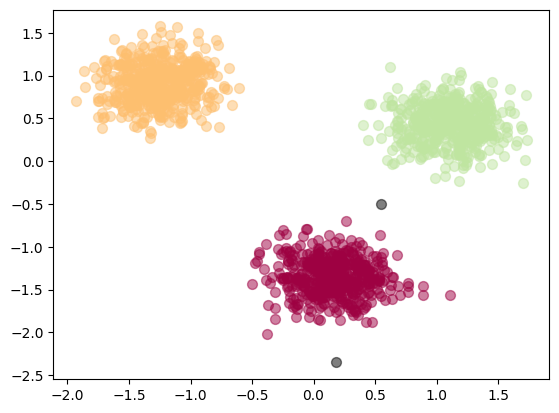

In [17]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = x[class_member_mask & core_smaples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = x[class_member_mask & ~core_smaples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)